### Setting up

In [1]:
# installing

!pip install pycaret --quiet
!pip install pycaret[full] --quiet

In [2]:
# importing

import pycaret
pycaret.__version__

'3.2.0'

## Binary Classification

### Data loading


In [3]:
# loading the data

from pycaret.datasets import get_data
data = get_data('diabetes')
data

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Building model

In [4]:
# the classification experiment

from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [8]:
# initializing the setup in experiment
from pycaret.classification import setup

setup(data, target="Class variable", session_id=124)

,Description,Value
0,Session id,124
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [9]:
# training the models

best = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7653,0.8210,0.5880,0.6949,0.6314,0.4625,0.4697,0.2480
ridge,Ridge Classifier,0.7541,0.0000,0.5292,0.6976,0.5962,0.4259,0.4375,0.0420
lda,Linear Discriminant Analysis,0.7523,0.8250,0.5345,0.6894,0.5957,0.4232,0.4340,0.0330
catboost,CatBoost Classifier,0.7523,0.8234,0.5830,0.6725,0.6199,0.4386,0.4444,2.4490
et,Extra Trees Classifier,0.7522,0.8098,0.5336,0.6850,0.5955,0.4223,0.4313,0.2440
lr,Logistic Regression,0.7505,0.8214,0.5348,0.6885,0.5968,0.4213,0.4316,0.1850
lightgbm,Light Gradient Boosting Machine,0.7466,0.8014,0.5985,0.6559,0.6221,0.4330,0.4368,0.3540
gbc,Gradient Boosting Classifier,0.7375,0.8045,0.5728,0.6445,0.6009,0.4080,0.4132,0.1620
nb,Naive Bayes,0.7371,0.7955,0.5711,0.6469,0.6032,0.4083,0.4126,0.0560
ada,Ada Boost Classifier,0.7356,0.7948,0.5623,0.6324,0.5853,0.3967,0.4034,0.1380


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Now it's time to analyse the model

### Visualising the model res

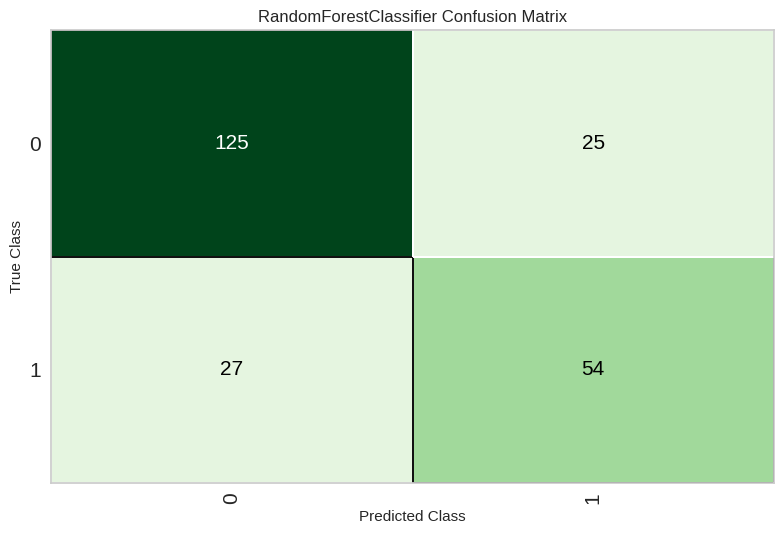

In [10]:
from pycaret.classification import plot_model

# confusion matrix
plot_model(best, plot="confusion_matrix")

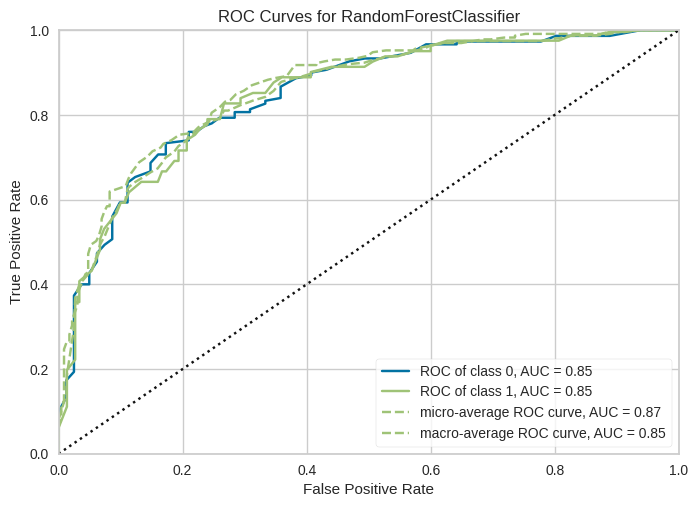

In [11]:
# plot AUC

plot_model(best, plot = 'auc')

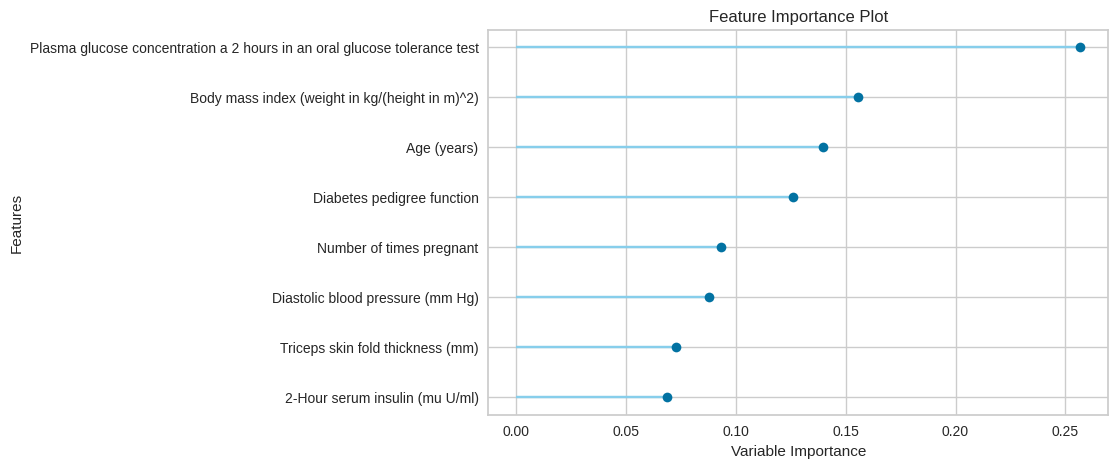

In [12]:
# plot feature importance
plot_model(best, plot = 'feature')

### Model evaluation

In [13]:
# evaluation of the model

from pycaret.classification import evaluate_model

evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Model prediction

In [14]:
# prediction
from pycaret.classification import predict_model

prediction = predict_model(best)
prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7749,0.8490,0.6667,0.6835,0.6750,0.5029,0.5029


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
296,2,146,70,38,360,28.000000,0.337,29,1,0,0.60
6,3,78,50,32,88,31.000000,0.248,26,1,0,0.96
70,2,100,66,20,90,32.900002,0.867,28,1,0,0.89
267,2,128,64,42,0,40.000000,1.101,24,0,1,0.51
100,1,163,72,0,0,39.000000,1.222,33,1,1,0.76


In [15]:
# for new data

new_data = data.copy()
new_data.drop('Class variable', axis=1, inplace=True)
new_data = new_data.sample(10)
new_data

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
47,2,71,70,27,0,28.0,0.586,22
434,1,90,68,8,0,24.5,1.138,36
242,3,139,54,0,0,25.6,0.402,22
139,5,105,72,29,325,36.9,0.159,28
694,2,90,60,0,0,23.5,0.191,25
650,1,91,54,25,100,25.2,0.234,23
412,1,143,84,23,310,42.4,1.076,22
741,3,102,44,20,94,30.8,0.400,26
287,1,119,86,39,220,45.6,0.808,29
604,4,183,0,0,0,28.4,0.212,36


In [16]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),prediction_label,prediction_score
47,2,71,70,27,0,28.000000,0.586,22,0,0.98
434,1,90,68,8,0,24.500000,1.138,36,0,0.96
242,3,139,54,0,0,25.600000,0.402,22,1,0.74
139,5,105,72,29,325,36.900002,0.159,28,0,0.92
694,2,90,60,0,0,23.500000,0.191,25,0,1.00


### Saving the model

In [17]:
from pycaret.classification import save_model

save_model(best, "binary_classify_pipeline")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_w

### Loading the saved model

In [18]:
from pycaret.classification import load_model

loaded = load_model("binary_classify_pipeline")
loaded

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weight in '
                                             'kg/(height in m)^2)',
                                             'Diab...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=124,
                                        verbose=0, warm_start=False))],
         verbose=False)

## Multiclass Classification

### Getting the data

In [19]:
from pycaret.datasets import get_data
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Building the model

In [24]:
setup(data, target = 'species', session_id = 143)

,Description,Value
0,Session id,143
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [25]:
from pycaret.classification import ClassificationExperiment, setup
exp_2 = ClassificationExperiment()

exp_2.setup(data, target = 'species', session_id = 143)

,Description,Value
0,Session id,143
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


In [26]:
%%time

best_clf = exp_2.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9900,1.0000,0.9900,0.9920,0.9896,0.9846,0.9860,0.0340
qda,Quadratic Discriminant Analysis,0.9809,1.0000,0.9809,0.9852,0.9805,0.9710,0.9735,0.0460
lr,Logistic Regression,0.9709,0.9976,0.9709,0.9777,0.9705,0.9561,0.9598,0.0540
nb,Naive Bayes,0.9709,0.9976,0.9709,0.9777,0.9705,0.9561,0.9598,0.0360
et,Extra Trees Classifier,0.9709,1.0000,0.9709,0.9777,0.9705,0.9561,0.9598,0.1830
catboost,CatBoost Classifier,0.9709,0.9976,0.9709,0.9777,0.9705,0.9561,0.9598,0.9810
knn,K Neighbors Classifier,0.9627,0.9976,0.9627,0.9665,0.9619,0.9432,0.9457,0.0540
dt,Decision Tree Classifier,0.9618,0.9711,0.9618,0.9704,0.9610,0.9422,0.9471,0.0360
rf,Random Forest Classifier,0.9618,0.9976,0.9618,0.9704,0.9610,0.9422,0.9471,0.3980
gbc,Gradient Boosting Classifier,0.9618,0.9796,0.9618,0.9704,0.9610,0.9422,0.9471,0.2590


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

CPU times: user 6.96 s, sys: 166 ms, total: 7.13 s
Wall time: 32.2 s


### Plotting

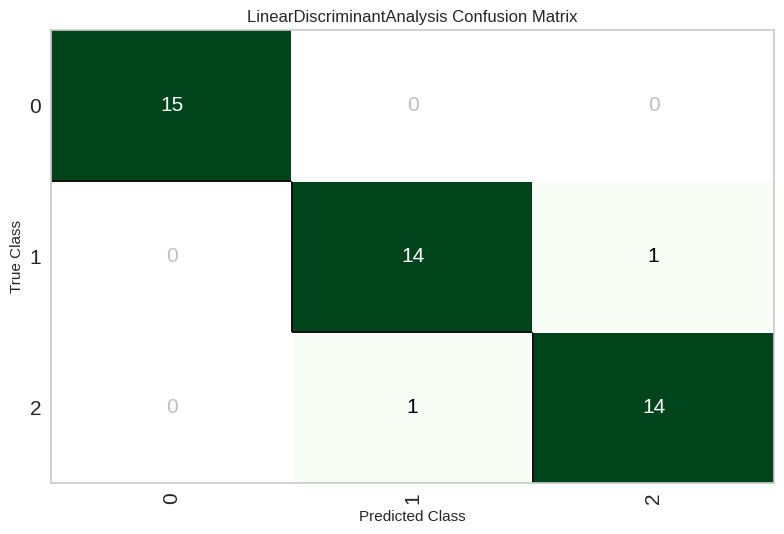

In [29]:
from pycaret.classification import plot_model

# plot confusion matrix
plot_model(best_clf, plot = 'confusion_matrix')

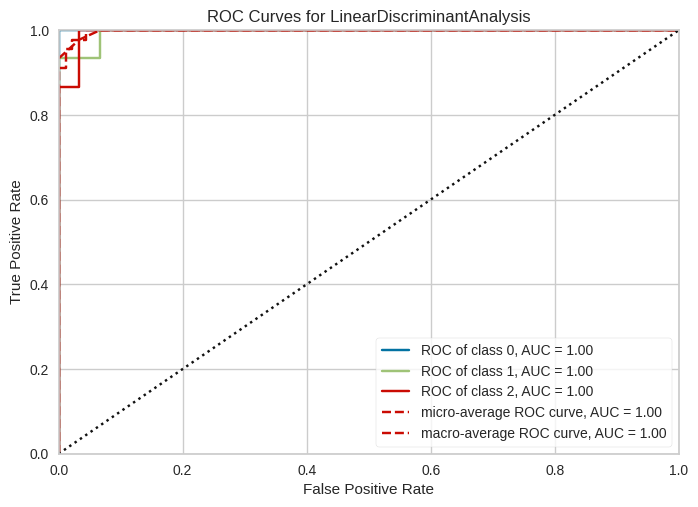

In [31]:
# plot AUC
plot_model(best_clf, plot = 'auc')

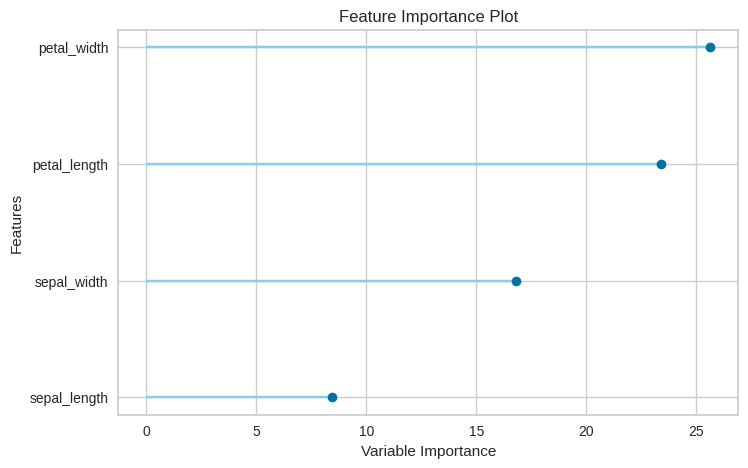

In [32]:
# plot feature importance
plot_model(best_clf, plot = 'feature')

### Model Evaluation

In [35]:
evaluate_model(best_clf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### customizing

In [36]:
# getting the current config

from pycaret.classification import get_config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [38]:
from pycaret.classification import models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [40]:
# custom models
from pycaret.classification import compare_models

compare_tree_models = compare_models(include = ['dt', 'rf', 'et',])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9709,1.0000,0.9709,0.9777,0.9705,0.9561,0.9598,0.1810
dt,Decision Tree Classifier,0.9618,0.9711,0.9618,0.9704,0.9610,0.9422,0.9471,0.8540
rf,Random Forest Classifier,0.9618,0.9976,0.9618,0.9704,0.9610,0.9422,0.9471,0.2190


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [41]:
# get all of the metrics

from pycaret.classification import pull
pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9709,1.0000,0.9709,0.9777,0.9705,0.9561,0.9598,0.181
dt,Decision Tree Classifier,0.9618,0.9711,0.9618,0.9704,0.9610,0.9422,0.9471,0.854
rf,Random Forest Classifier,0.9618,0.9976,0.9618,0.9704,0.9610,0.9422,0.9471,0.219


## Regression

## Time Series Forecasting


## Clustering

## Anomaly Detection